In [49]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
%matplotlib inline
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

def array2matrix(x):
    if len(x.shape)==1:
        x = x.reshape(x.shape[0],1)
    return x
def show_vector(x):
    plt.figure(figsize=(8, 4))
    plt.plot(np.array(range(len(x))),x,linewidth = 0.3)
    plt.scatter(np.array(range(len(x))),x,s=3)
    plt.grid()
def show_matrix(x):
    #plt.clf()
    plt.figure(figsize=(8, 4))
    for i in range(x.shape[1]):
        plt.plot(np.array(range(len(x[:,i]))),x[:,i],linewidth = 0.3)
        plt.scatter(np.array(range(len(x[:,i]))),x[:,i],s=3)
    plt.grid()
    #plt.pause(0.001)
    #if is_ipython:
    #   display.clear_output(wait=True)
def show(x):
    show_matrix(x) if len(x.shape)>1 else show_vector(x)

In [247]:
def Relu(y):
    result = np.where(y<0,0,y)
    return result
def MSE_loss(y,y2):
    return np.mean(np.square(y2-y))
def Linear(x,w,b):
    return x.dot(w)+b
def z_score(x):
    x = (x-np.mean(x,axis=0))/np.std(x,axis=0)
    return x
def propagate(x,y,w1,b1,w2,b2,hidden):
    """
    传参:
    x -- 数据集, shape： (m,n),m为样本数,n为特征
    y -- 真实标签, shape： (m,1),m为样本数
    返回值:
    cost,dw1,db1,dw2,db2 后四个放在一个字典grads里
    """
    #前向传播
    y1 = Linear(x,w1,b1)
    r = Relu(y1)
    y2 = Linear(r,w2,b2)
    loss = MSE_loss(y,y2) 
    #反向传播
    dloss = 2*(y2-y)
    dw2 = r.T.dot(dloss)
    db2 = sum(dloss)
    dr  = dloss.dot(w2.T)
    dr[y1<0] = 0
    dw1 = x.T.dot(dr)
    db1 = dr.T.dot(dloss).squeeze()
    #返回值
    grads = {"dw1":dw1,"db1":db1,"dw2":dw2,"db2":db2}
    return grads,loss
def optimize(x,y,w1,b1,w2,b2,hidden,learning_rate,num_iteration,print_cost=False):
    #定义一个losses数组，存放每若干次迭代后的loss，从而可以画图看看loss的变化趋势：
    losses = []
    for i in range(num_iteration):
        grads,loss = propagate(x,y,w1,b1,w2,b2,hidden)
        dw1 = grads["dw1"]
        dw2 = grads["dw2"]
        db1 = grads["db1"]
        db2 = grads["db2"]
        w1 -= learning_rate*dw1
        w2 -= learning_rate*dw2
        #b1 -= learning_rate*db1
        #b2 -= learning_rate*db2
        # 每100次迭代，保存一个loss看看：
        if i % 100 == 0:
            losses.append(loss)
    params = {"w1": w1,"b1": b1,"w2": w2,"b2": b2,}
    grads = {"dw1": dw1,"db1": db1,"dw2": dw2,"db2": db2}
    return params, grads, np.array(losses)
def predict(w1,b1,w2,b2,x_test):
    y_prediction = Relu(x_test.dot(w1)+b1).dot(w2)+b2
    return y_prediction

In [248]:
#封装
def linearRegression(x,y,train_rate=0.9,hidden=30,learning_rate=1e-6,num_iteration=10000,print_cost=False):
    dim = x.shape[1]
    feature_num = x.shape[1]
    sample_num = x.shape[0]
    train_num = int(sample_num*train_rate)
    test_num = sample_num-train_num
    x_train = x[:train_num]
    x_test = x[train_num:]
    y_train = y[:train_num]
    y_test = y[train_num:]
    w1 = np.random.randn(feature_num,hidden)
    b1 = np.zeros(hidden)
    w2 = np.random.rand(hidden,1)
    b2 = np.zeros(1)
    params,grads,losses = optimize(x_train,y_train,w1,b1,w2,b2,hidden,learning_rate,num_iteration)
    prediction_test = predict(params['w1'],params['b1'],params['w2'],params['b2'],x_test)
    prediction_train = predict(params['w1'],params['b1'],params['w2'],params['b2'],x_train)
    train = np.hstack((y_train,prediction_train))
    test = np.hstack((y_test,prediction_test))
    show(train)
    show(test)
    show(losses)
    accuracy_train = 1 - np.mean(np.abs((prediction_train-y_train)/y_train))
    accuracy_test = 1 - np.mean(np.abs((prediction_test-y_test)/y_test))
    print("accuracy_train:{}\naccuracy_test:{}".format(accuracy_train,accuracy_test))
    return

accuracy_train:0.8971445655205387
accuracy_test:0.7860333696374876


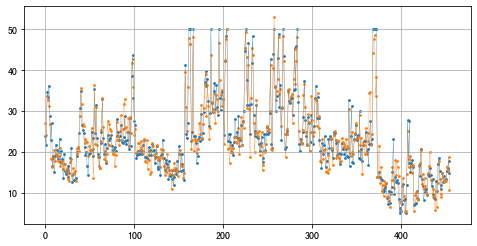

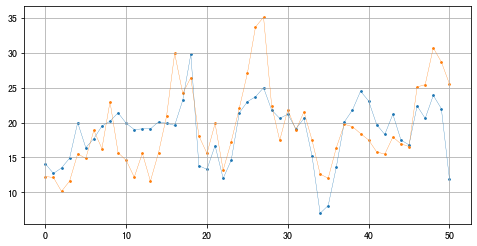

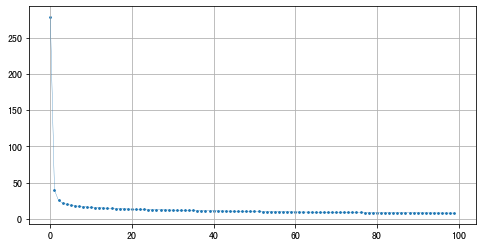

In [249]:
data = load_boston()
x = data['data']
x = z_score(x)
y = data['target']
y = y.reshape(y.shape[0],1)
linearRegression(x,y)

In [230]:
"""
    使用numpy实现Boston房价预测
    Step1 数据加载，来源sklearn中的load_boston
    Step2 数据规范化，将X 采用正态分布规范化
    Step3 初始化网络
    Step4 定义激活函数，损失函数，学习率 epoch
    Step5 循环执行：前向传播，计算损失函数，反向传播，参数更新
    Step6 输出训练好的model参数，即w1, w2, b1, b2
""" 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.utils import shuffle, resample

# 数据加载
# X_为506*13矩阵,即506个样本,每个样本13个特征值
# Y为506个数的数组,即506个值
data = load_boston()
X_ = data['data']
Y = data['target']
# 将y转化为矩阵的形式
# 由于Y是向量,因此要转成506*1矩阵
y = Y.reshape(Y.shape[0],1)
# 数据规范化
# min-max方法:
#x = (X_ - np.min(X_,axis=0))/(np.max(X_,axis=0)-np.min(X_,axis=0))
# z-score方法:
x = (X_ - np.mean(X_, axis=0)) / np.std(X_, axis=0)
"""
    初始化网络参数
    定义隐藏层维度，w1,b1,w2,b2
""" 
# 获取x的特征值个数,即13
n_features = x.shape[1]
# 设置训练特征值个数
n_hidden = 10
# 初始化w1,w2,b1,b2
# w1用正态分布初始化,此处返回13*10矩阵
w1 = np.random.randn(n_features,n_hidden)
# b1初始化为全0,此处返回10个0值向量
b1 = np.zeros(n_hidden)
# w2用正态分布初始化,值在[0,1)之间,此处是10*1矩阵
w2 = np.random.rand(n_hidden, 1)
# b2初始化为0
b2 = np.zeros(1)
# 设置学习率,梯度下降步长
learning_rate = 1e-6

In [192]:
# relu函数,激活函数,使学习过程非线性化
def Relu(x):
    """ 这里写你的代码 """
    pass
    result = np.where(x<0,0,x)
    return result

In [193]:
# 定义损失函数,此处用MSE函数,即mean_square_error,均方差
def MSE_loss(y, y_hat):
    """ 这里写你的代码 """
    pass
    return np.mean(np.square(y_hat-y))

In [194]:
# 定义线性回归函数
def Linear(x, w, b):
    """ 这里写你的代码 """
    pass
    return x.dot(w)+b

In [195]:
# 5000次迭代
#plt.ion()
loss = 0
for t in range(5000):
    # 前向传播，计算预测值y (Linear->Relu->Linear)
    """ 这里写你的代码 """
    y1 = Linear(x,w1,b1)
    relu_y1 = Relu(y1)
    y_pre = Linear(relu_y1,w2,b2)
    # 计算损失函数, 并输出每次epoch的loss
    """ 这里写你的代码 """
    loss = MSE_loss(y,y_pre)
    #print('times:{},loss:{}'.format(t,loss))
    # 反向传播，基于loss 计算w1,w2,b1,b2的梯度
    """ 这里写你的代码 """
    # 首先列出一下各参数纬度:
    # x:506*13
    # y_pre:506*1
    # y:506*1
    # y1:506*10
    # relu_y1:506*10
    # L:1
    # w1:13*10
    # w2:10*1
    # b1:10*1
    # b2:1
    # 此处的loss函数为MSE,即:L = (y_pre-y)^2 = y^2 - 2y*y_pre + y_pre^2 = (y.T)(Y)-2(y.T)(y_pre)+(y_pre.T)·(y_pre)
    # 所以对y_pre求导:dL/dy_pre=2(y_pre-y)
    grad_y_pre = 2*(y_pre-y)
    # grad_y_pre:506*1
    # 对w2求导:dL/dw2 = (dL/dy_pre)*(dy_pre/dw2)=relu_y1.T·grad_y_pre
    # 因此grad_w2与w2维度相同:10*1
    grad_w2 = relu_y1.T.dot(grad_y_pre)
    # 对relu_y1求导:dL/drelu_y1=(dL/dy_pre)*(dy_pre/drelu_y1)=grad_y_pre·w2.T
    # grad_relu_y1:506*10
    grad_relu_y1 = grad_y_pre.dot(w2.T)
    grad_relu_y1[y1<0]=0
    grad_w1 = x.T.dot(grad_relu_y1)
    grad_b2 = sum(grad_y_pre)
    grad_b1 = grad_relu_y1.T.dot(grad_y_pre).squeeze()
    # 更新权重, 对w1, w2, b1, b2进行更新
    """ 这里写你的代码 """
    w1 -= learning_rate*grad_w1
    w2 -= learning_rate*grad_w2
print(loss)

10.969499800120632


In [198]:
# 得到最终的w1, w2
#print('w1={} \n w2={}'.format(w1, w2))